# Prueba técnica
Para el desarrollo de la prueba es necesario cargar las siguientes bibliotecas (librerias):
- Numpy
- Pandas
- Matplot

In [1357]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Teniendo las bibliotecas cargadas se procede a cargar la data cruda ubicada en el archivo acelero.txt

In [1358]:
df_acelero = pd.read_csv("./acelero.txt")
print(df_acelero)

         Tiempo  Posición  Temperatura
0    1695686400 -7.501667    32.524667
1    1695690000 -7.505167    32.528167
2    1695693600 -7.504500    32.522000
3    1695697200 -7.500500    32.517833
4    1695700800 -7.504167    32.531667
..          ...       ...          ...
692  1698177600 -7.409583    31.729000
693  1698181200 -7.400417    31.721833
694  1698184800 -7.398083    31.721833
695  1698188400 -7.401083    31.716833
696  1698192000 -7.420000    31.720000

[697 rows x 3 columns]


Para una mejor visualización al momento del análisis se convierten los datos de tiempo a fecha (año-mes-día) en una nueva columna llamada "Fecha"

In [1359]:
df_acelero["Fecha"] = pd.to_datetime(df_acelero["Tiempo"], unit="s")
print(df_acelero)

         Tiempo  Posición  Temperatura               Fecha
0    1695686400 -7.501667    32.524667 2023-09-26 00:00:00
1    1695690000 -7.505167    32.528167 2023-09-26 01:00:00
2    1695693600 -7.504500    32.522000 2023-09-26 02:00:00
3    1695697200 -7.500500    32.517833 2023-09-26 03:00:00
4    1695700800 -7.504167    32.531667 2023-09-26 04:00:00
..          ...       ...          ...                 ...
692  1698177600 -7.409583    31.729000 2023-10-24 20:00:00
693  1698181200 -7.400417    31.721833 2023-10-24 21:00:00
694  1698184800 -7.398083    31.721833 2023-10-24 22:00:00
695  1698188400 -7.401083    31.716833 2023-10-24 23:00:00
696  1698192000 -7.420000    31.720000 2023-10-25 00:00:00

[697 rows x 4 columns]


Ya con la base de datos cargada y editada se procede a realizar los ejercicios de la prueba

## Punto 1: Análisis de Señales y Series de tiempo

### 1. Grafica la señal (Tiempo en el eje X, Valor en el eje Y).

Para esto se realiza un gráfico de dispersión de Tiempo (en este caso representado por "Fecha") vs Posición.

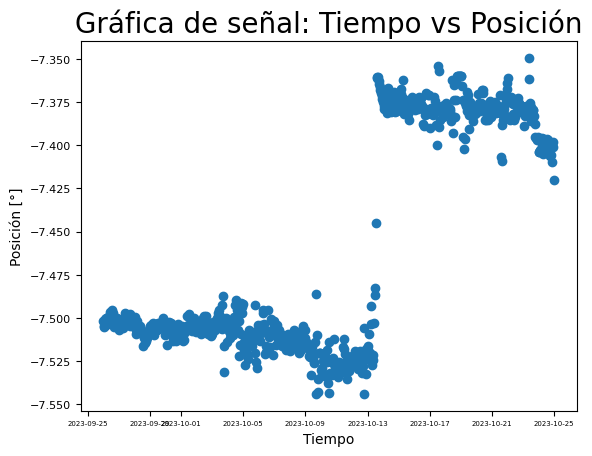

In [1360]:
plt.scatter(df_acelero["Fecha"], df_acelero["Posición"])
plt.title("Gráfica de señal: Tiempo vs Posición", fontsize=20)
plt.xlabel("Tiempo")
plt.ylabel("Posición [°]")
plt.xticks(fontsize=5)
plt.yticks(fontsize=8)
plt.show()

**Análisis:** 

### 2. Calcula y muestra la línea base a partir de la cual oscila el acelerómetro.

Para la solución de este punto se calcula la media movil que representa la línea base a partir de la cual oscila el acelerómetro.

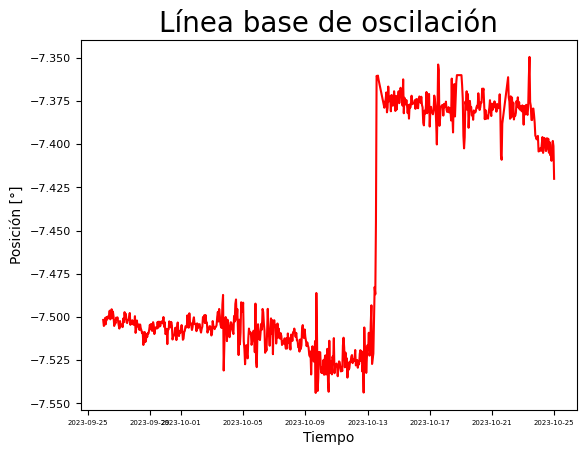

In [1361]:
plt.plot(
    df_acelero["Fecha"],
    df_acelero["Posición"],
    color="red",
)
plt.title("Línea base de oscilación", fontsize=20)
plt.xlabel("Tiempo")
plt.ylabel("Posición [°]")
plt.xticks(fontsize=5)
plt.yticks(fontsize=8)
plt.show()

**Análisis:** 

### 3. Encuentra y muestra el valor máximo y mínimo de la posición.

Para obtener el valor máximo y mínimo de la posición se usan los métodos max() y min().

In [1362]:
# Hallar el indice en el que se encuentra la máxima y mínima posición
idx_max = df_acelero["Posición"].idxmax()
idx_min = df_acelero["Posición"].idxmin()
# Hallar las fechas en las que se produjeron los valores max y min de la posición
fecha_max = df_acelero["Fecha"].loc[idx_max]
fecha_min = df_acelero["Fecha"].loc[idx_min]
# Encontrar el valor max y min de la posicion
max_posicion = df_acelero["Posición"].max().round(4)
min_posicion = df_acelero["Posición"].min().round(4)
# Imprimir el valor max y min de la posición con sus respectivas fechas de ocurrencia
print(f"Valor máximo de Posición: {max_posicion} Fecha: {fecha_max}")
print(f"Valor mínimo de Posición: {min_posicion} Fecha: {fecha_min}")

Valor máximo de Posición: -7.3495 Fecha: 2023-10-23 10:00:00
Valor mínimo de Posición: -7.5439 Fecha: 2023-10-09 16:00:00


Para visualizar estos puntos en el gráfico se procede a ejecutar el siguiente código

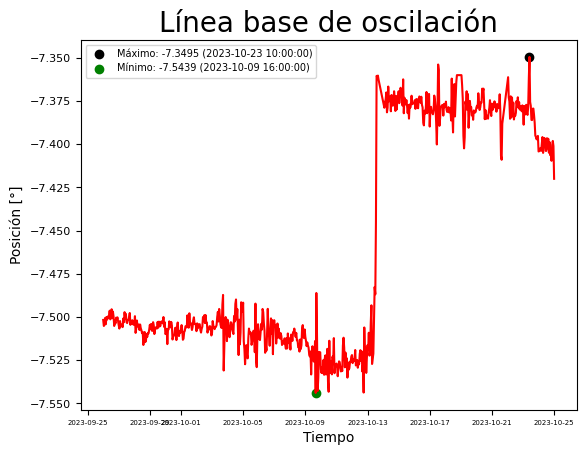

In [1363]:
plt.plot(
    df_acelero["Fecha"],
    df_acelero["Posición"],
    color="red",
)
plt.title("Línea base de oscilación", fontsize=20)
plt.xlabel("Tiempo")
plt.ylabel("Posición [°]")
plt.xticks(fontsize=5)
plt.yticks(fontsize=8)
plt.scatter(
    df_acelero["Fecha"].iloc[df_acelero["Posición"].idxmax()],
    max_posicion,
    color="black",
    marker="o",
    label=f"Máximo: {max_posicion} ({fecha_max})",
)
plt.scatter(
    df_acelero["Fecha"].iloc[df_acelero["Posición"].idxmin()],
    min_posicion,
    color="green",
    marker="o",
    label=f"Mínimo: {min_posicion} ({fecha_min})",
)
plt.legend(loc="upper left", fontsize=7)
plt.show()

### 4. Encuentra si hay cambios notables en la serie de tiempo más allá de la oscilación periódica.



### 5. Encuentra si existe alguna influencia de la temperatura en la oscilación del acelerómetro y cuantifícala.

Para visualizar si existe influencia de la temperatura con la oscilación se procede a agregar al gráfico un tercer eje con la variable "Temperatura".

Text(0, 0.5, 'Temperatura [°C]')

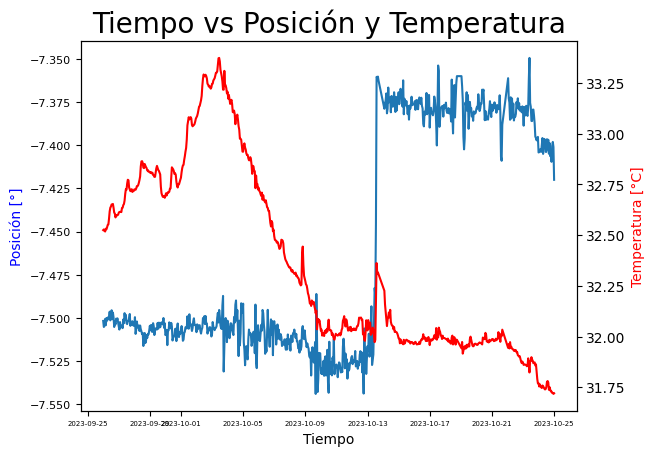

In [1364]:
fig, axes = plt.subplots()
axes.plot(df_acelero["Fecha"], df_acelero["Posición"])
axes.set_title("Tiempo vs Posición y Temperatura", fontsize=20)
axes.set_xlabel("Tiempo")
axes.set_ylabel("Posición [°]", color="b")
plt.xticks(fontsize=5)
plt.yticks(fontsize=8)
twin_axes = axes.twinx()
twin_axes.plot(df_acelero["Fecha"], df_acelero["Temperatura"], "r")
twin_axes.set_ylabel("Temperatura [°C]", color="r")

En el gráfico se observa que cuando se presentan temperaturas altas la ooscilación es baja y cuando la temperatura cae el comportamiento de la oscilación presenta valores altos, sin embargo, para cuantificar esta vaiación que genera la temperatura sobre la oscilación se calcula la correlación que existe entre ambas variables (Temperatura y Posición), la cual da una medida de la fuerza y la dirección de la relación lineal entre dichas variables. 

Para calcular la correlación se usa la función .corr de la biblioteca de Pandas.

In [1365]:
correlacion = df_acelero["Posición"].corr(df_acelero["Temperatura"])
print(f"Correlación entre Posición y Temperatura: {correlacion}")

Correlación entre Posición y Temperatura: -0.6247660606462356


Es importante mencionar que un valor cercano a -1 indica una correlación negativa (a medida que una variable aumenta, la otra tiende a disminuir), en este caso se puede el coeficiente de correlación es **-0.6248** representando de esta manera una correlación negativa moderada.

### 6. Encuentra y grafica el momento en el que ocurrió el mayor cambio en la serie de tiempo.

Para esta parte de la prueba se procede a calcular la diferencia entre los valores sucesivos de la variable 'Posición' y luego hallar el valor máximo absoluto de dichas diferencias. 

- Para calcular las diferencias se usa la función .diff()

In [1366]:
# Calculo de diferencia entre los valores sucesivos de Posición (añade columna llamada Cambio_posicion)
df_acelero["Cambio_Posicion"] = df_acelero["Posición"].diff()
print(df_acelero)
# Encontrar el mayor cambio absoluto y la fecha en la que ocurrió
mayor_cambio = df_acelero["Cambio_Posicion"].abs().max()
idx_mayor_cambio = df_acelero["Cambio_Posicion"].abs().idxmax()
fecha_mayor_cambio = df_acelero["Fecha"].loc[idx_mayor_cambio]
print(
    f"Mayor cambio de Posición (absoluto): {mayor_cambio} Fecha:  {fecha_mayor_cambio}"
)

         Tiempo  Posición  Temperatura               Fecha  Cambio_Posicion
0    1695686400 -7.501667    32.524667 2023-09-26 00:00:00              NaN
1    1695690000 -7.505167    32.528167 2023-09-26 01:00:00        -0.003500
2    1695693600 -7.504500    32.522000 2023-09-26 02:00:00         0.000667
3    1695697200 -7.500500    32.517833 2023-09-26 03:00:00         0.004000
4    1695700800 -7.504167    32.531667 2023-09-26 04:00:00        -0.003667
..          ...       ...          ...                 ...              ...
692  1698177600 -7.409583    31.729000 2023-10-24 20:00:00        -0.003917
693  1698181200 -7.400417    31.721833 2023-10-24 21:00:00         0.009167
694  1698184800 -7.398083    31.721833 2023-10-24 22:00:00         0.002333
695  1698188400 -7.401083    31.716833 2023-10-24 23:00:00        -0.003000
696  1698192000 -7.420000    31.720000 2023-10-25 00:00:00        -0.018917

[697 rows x 5 columns]
Mayor cambio de Posición (absoluto): 0.08449358974358923 Fecha: 

Para graficar el momento en el que ocurrió este mayor cambio se represento con una línea de color negra en el gráfico de dispersión Tiempo vs Posición

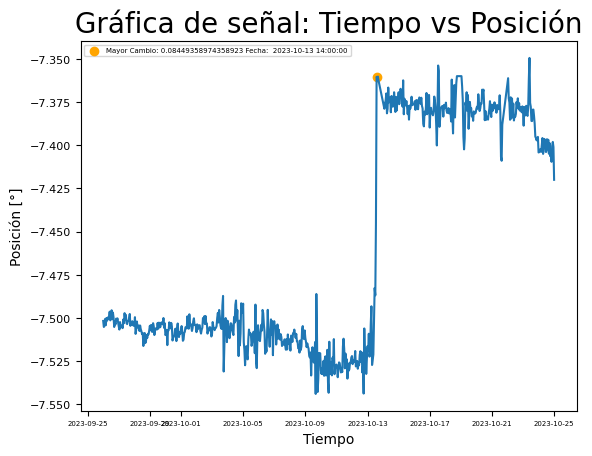

In [1367]:
plt.plot(df_acelero["Fecha"], df_acelero["Posición"])
plt.title("Gráfica de señal: Tiempo vs Posición", fontsize=20)
plt.xlabel("Tiempo")
plt.ylabel("Posición [°]")
plt.xticks(fontsize=5)
plt.yticks(fontsize=8)
plt.scatter(
    df_acelero["Fecha"].iloc[idx_mayor_cambio],
    df_acelero["Posición"].iloc[idx_mayor_cambio],
    color="orange",
    label=f"Mayor Cambio: {mayor_cambio} Fecha:  {fecha_mayor_cambio}",
    marker="o",
)
plt.legend(loc="upper left", fontsize=5)

### 7. Grafica la serie de tiempo junto con las fechas que marquen los momentos de mayores cambios

En este punto se procedio a realizar un histograma con las diferencia entre los valores sucesivos de Posición para saber como es su distribución

(array([54., 42., 33., 45., 48., 49., 30., 46., 26., 28., 23., 31., 19.,
        23., 13., 10., 15., 11.,  9.,  9., 18., 12.,  7.,  6.,  6.,  3.,
         3.,  8.,  7.,  3.,  2.,  3.,  4.,  1.,  2.,  4.,  0.,  2.,  0.,
         2.,  0.,  2.,  1.,  2.,  3.,  2.,  3.,  2.,  2.,  3.,  1.,  0.,
         0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,
         0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,
         2.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

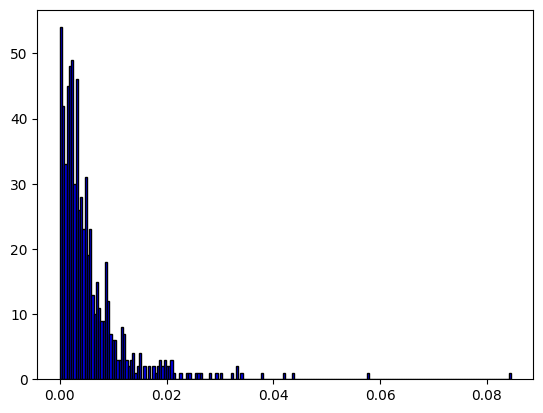

In [1368]:
data = df_acelero["Cambio_Posicion"].abs()
plt.hist(data, bins=200, color="blue", edgecolor="black")

Como se logra observar en el histograma las diferencias se concentran entre los valores 0 y 0.02 aproximadamente por lo que se considerara como momentos de mayor cambio aquellos que esten por encima de 0.02

In [1369]:
umbral = 0.02
cambios_mayores = df_acelero[
    data > umbral
]
print(cambios_mayores)


         Tiempo  Posición  Temperatura               Fecha  Cambio_Posicion
186  1696356000 -7.530950    33.217314 2023-10-03 18:00:00        -0.043745
210  1696442400 -7.501535    33.020000 2023-10-04 18:00:00         0.020465
217  1696467600 -7.514083    32.943314 2023-10-05 01:00:00        -0.022408
235  1696532400 -7.492222    32.731667 2023-10-05 19:00:00         0.028128
236  1696536000 -7.525428    32.793875 2023-10-05 20:00:00        -0.033206
328  1696867200 -7.543917    32.114417 2023-10-09 16:00:00        -0.030012
329  1696870800 -7.486078    32.127471 2023-10-09 17:00:00         0.057839
330  1696874400 -7.509822    32.035496 2023-10-09 18:00:00        -0.023745
331  1696878000 -7.542786    32.069059 2023-10-09 19:00:00        -0.032963
349  1696942800 -7.513714    32.036369 2023-10-10 13:00:00         0.029536
357  1696971600 -7.532500    31.984389 2023-10-10 21:00:00        -0.020306
403  1697137200 -7.506038    31.983228 2023-10-12 19:00:00         0.037673
415  1697180

Estas variaciones se ubican en la serie de tiempo de la sigiente manera:

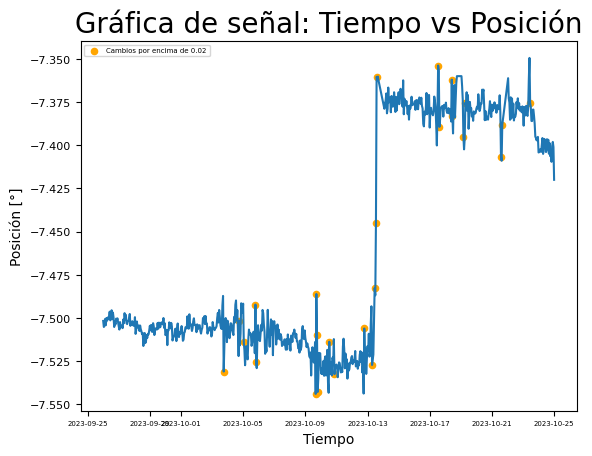

In [1370]:
plt.plot(df_acelero["Fecha"], df_acelero["Posición"])
plt.title("Gráfica de señal: Tiempo vs Posición", fontsize=20)
plt.xlabel("Tiempo")
plt.ylabel("Posición [°]")
plt.xticks(fontsize=5)
plt.yticks(fontsize=8)
plt.scatter(
    cambios_mayores["Fecha"],
    cambios_mayores["Posición"],
    color="orange",
    label=f"Cambios por encima de 0.02",
    s=20,
)
plt.legend(loc="upper left", fontsize=5)